# Vehicle Count and Speed 



> The [SANRAL_v3](https://zindi.africa/competitions/uber-movement-sanral-cape-town-challenge/data) ```Vehicle detection sensor (VDS)``` data contains car count and speed limit data. We can add this and update our predictions.

> It does however require some wrangling. 

In [ ]:
#because we're on google colab
!pip install pandas
!pip install geopandas

In [2]:
%matplotlib inline

import os
import pandas as pd
import geopandas as gpd

from pathlib import Path
import glob

In [ ]:
# mount google drive as a file system
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [4]:
#set path
path = Path('/content/gdrive/My Drive/Zindi_Accident')

#### Lets first create one single file that contains all the ```vds``` data. We're ```training``` with 2017 and our personal ```test``` is the last four months of 2018.

In [5]:
#read the files in the folder
vds = os.path.join(path/'data/vds/other/*.csv')
all_files = glob.glob(vds)
all_files

['/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC February 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC March 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC April 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC May 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC June 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC July 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC August 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC September 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC October 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC November 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC December 2017 Hourly.csv',
 '/content/gdrive/My Drive/Zindi_Accident/data/vds/other/WC Janu

In [6]:
#initializes df which will hold the csv files
all_data = pd.DataFrame() 

#header from the '''csv```
header_list = ["Region", "Site_name", "date", "hour", "Vehicle_class", "Total_count", "ave_speed"]

for f in all_files:
  #create dataframe with parameters
  df = pd.read_csv(f, names=header_list, sep = ';', parse_dates = ['date'])
  #appends df with each other
  all_data = all_data.append(df, ignore_index=True)
  #sort 
  all_data = all_data.sort_values('date').reset_index(drop=True)

In [7]:
all_data.head(3)

,Region,Site_name,date,hour,Vehicle_class,Total_count,ave_speed
0,WC,DS VDS 101 IB,2017-01-01,0,1,837,103.62
1,WC,DS VDS 104 IB,2017-01-01,16,3,9,95.65
2,WC,DS VDS 104 IB,2017-01-01,16,2,18,95.65


In [8]:
all_data.tail(3)

,Region,Site_name,date,hour,Vehicle_class,Total_count,ave_speed
4123437,WC,DS VDS 111 OB,2018-12-31,12,1,3582,85.93
4123438,WC,VDS 914 OB,2018-12-31,9,2,22,74.35
4123439,WC,DS WTRNX 269A IB,2018-12-31,10,3,9,84.10


In [9]:
all_data.shape

(4123440, 7)

In [10]:
#check some values
#months
print(all_data.date.dt.month.unique())
print('')
#days
print(all_data.date.dt.day.unique())
print('')
#amount of days
print(all_data.date.dt.year.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

[2017 2018]


In [11]:
#check more some values
#unique cameras
print(all_data.Site_name.unique())
print('')
#amount of cameras
print(all_data.Site_name.unique().size)

['DS VDS 101 IB' 'DS VDS 104 IB' 'DS VDS 101 OB' 'VDS 916 OB' 'VDS 914 OB'
 'DS VDS 104 OB' 'VDS 914 IB' 'VDS 705 SB' 'VDS 705 NB' 'VDS 215 OB'
 'VDS 215 IB' 'DS VDS 107 IB' 'DS VDS 118 IB' 'DS VDS 117 OB'
 'DS VDS 117 IB' 'DS VDS 116 OB' 'DS VDS 116 IB' 'DS VDS 111 OB'
 'DS VDS 111 IB' 'DS VDS 109 OB' 'DS VDS 109 IB' 'DS VDS 107 OB' 'VDS 214'
 'DS WTRNX 406 IB' 'DS WTRNX 405 OB' 'DS WTRNX 269B S' 'DS WTRNX 269A IB'
 'DS WTRNX 204 OB' 'DS WTRNX 204 IB' 'DS WTRNX 201 OB' 'DS WTRNX 139 OB'
 'DS WTRNX 139 IB' 'DS VDS 913 OB' 'DS VDS 913 IB' 'DS WTRNX 407 IB'
 'VDS 209 IB' 'VDS 207 IB' 'VDS 203 OB' 'VDS 203 IB' 'VDS 108 OB'
 'VDS 108 IB' 'VDS 102 OB' 'VDS 102 IB' 'DS WTRNX 916 IB '
 'DS WTRNX 407 OB' 'DS VDS 306 North' 'DS VDS 309 North' 'DS VDS 118 OB'
 'DS VDS 230 OB' 'DS VDS 230 IB' 'DS VDS 229 OB' 'DS VDS 229 IB'
 'DS VDS 224 OB' 'DS VDS 224 IB' 'DS VDS 222 OB' 'DS VDS 222 IB'
 'DS VDS 217 OB' 'DS VDS 217 IB' 'DS VDS 214A OB' 'DS VDS 233 IB'
 'DS VDS 308 South' 'DS VDS 309 South' 'DS V

#### We need to change the name of these camera stations to match the location ```vds_location.csv```. 

> You'll notice I am grouping the inbound (IB) and outbound (OB) observations. This is due to the nature of the challenge and the available data. Had the ```road_segments.shp``` been separated into inbound and outbound lanes, and not a single vector, we could have applied the actual data to the appropriate road; as it is: we need to group.

> This will also mean that the original ```train``` and ```test``` dataset will increase in size because  a ```road_segment``` if it contains both inbound and outbound data; will be duplicated.  

In [12]:
def change_name(r):
  '''
  Define a function to change the name of the camera station
  '''
  if r.Site_name == 'DS VDS 101 IB':
    r.Site_name = 'VDS101'
  if r.Site_name == 'DS VDS 101 OB':
    r.Site_name = 'VDS101'
  if r.Site_name == 'DS VDS 104 IB':
    r.Site_name = 'VDS104'
  if r.Site_name == 'DS VDS 104 OB':
    r.Site_name = 'VDS104'
  if r.Site_name == 'DS VDS 107 IB':
    r.Site_name = 'VDS107'
  if r.Site_name == 'DS VDS 107 OB':
     r.Site_name = 'VDS107'
  if r.Site_name == 'DS VDS 109 IB':
     r.Site_name = 'VDS109'
  if r.Site_name == 'DS VDS 109 OB':
    r.Site_name = 'VDS109'
  if r.Site_name == 'DS VDS 111 IB':
    r.Site_name = 'VDS111'
  if r.Site_name == 'DS VDS 111 OB':
    r.Site_name = 'VDS111'
  if r.Site_name == 'DS VDS 113 IB':
    r.Site_name = 'VDS113'
  if r.Site_name == 'DS WTRNX 113 IB':
    r.Site_name = 'VDS113'
  if r.Site_name == 'DS WTRNX 113 OB':
    r.Site_name = 'VDS113'
  if r.Site_name == 'DS WTRNX 113B IB':
    r.Site_name = 'VDS113'  
  if r.Site_name == 'DS VDS 116 IB':
    r.Site_name = 'VDS116'
  if r.Site_name == 'DS VDS 116 OB':
    r.Site_name = 'VDS116'
  if r.Site_name == 'DS VDS 117 IB':
    r.Site_name = 'VDS117'
  if r.Site_name == 'DS VDS 117 OB':
    r.Site_name = 'VDS117'
  if r.Site_name == 'DS VDS 118 IB':
    r.Site_name = 'VDS118'
  if r.Site_name == 'DS VDS 118 OB':
    r.Site_name = 'VDS118'
  if r.Site_name == 'DS VDS 119 IB':
    r.Site_name = 'VDS119'
  if r.Site_name == 'DS VDS 119 OB':
    r.Site_name = 'VDS119'
  if r.Site_name == 'DS VDS 121 IB':
    r.Site_name = 'VDS121'
  if r.Site_name == 'DS VDS 121 OB':
    r.Site_name = 'VDS121'
  if r.Site_name == 'DS VDS 123 OB':
    r.Site_name = 'VDS123'
  if r.Site_name == 'DS VDS 123A IB':
    r.Site_name = 'VDS123A'
  if r.Site_name == 'DS VDS 125 IB':
    r.Site_name = 'VDS125'
  if r.Site_name == 'DS VDS 125 OB':
    r.Site_name = 'VDS125'
  if r.Site_name == 'DS VDS 130 IB':
    r.Site_name = 'VDS130'
  if r.Site_name == 'DS VDS 130 OB':
    r.Site_name = 'VDS130'
  if r.Site_name == 'DS VDS 132 IB':
    r.Site_name = 'VDS132I'
  if r.Site_name == 'DS VDS 132 OB':
    r.Site_name = 'VDS132O'
  if r.Site_name == 'DS VDS 135 IB':
    r.Site_name = 'VDS135I'
  if r.Site_name == 'DS VDS 135 OB':
    r.Site_name = 'VDS135O'
  if r.Site_name == 'DS VDS 138 IB':
    r.Site_name = 'VDS138'
  if r.Site_name == 'DS VDS 138 OB':
    r.Site_name = 'VDS138'
  if r.Site_name == 'DS WTRNX 139 IB':
    r.Site_name = 'VDS139I'
  if r.Site_name == 'DS WTRNX 139 OB':
    r.Site_name = 'VDS139O'
  if r.Site_name == 'DS VDS 202 IB':
    r.Site_name = 'VDS202'
  if r.Site_name == 'DS VDS 202 OB':
    r.Site_name = 'VDS202'
  if r.Site_name == 'DS VDS 207 OB':
    r.Site_name = 'VDS207'
  if r.Site_name == 'DS VDS 208 IB':
    r.Site_name = 'VDS208'
  if r.Site_name == 'DS VDS 208 OB':
    r.Site_name = 'VDS208'
  if r.Site_name == 'DS VDS 209 OB':
    r.Site_name = 'VDS209'
  if r.Site_name == 'DS VDS 211 OB':
    r.Site_name = 'VDS211'
  if r.Site_name == 'DS VDS 212 IB':
    r.Site_name = 'VDS212'
  if r.Site_name == 'VDS 214':
    r.Site_name = 'VDS214'
  if r.Site_name == 'DS VDS 214A IB':
    r.Site_name = 'VDS214A'
  if r.Site_name == 'DS VDS 214A OB':
    r.Site_name = 'VDS214A'
  if r.Site_name == 'VDS 215 IB':
    r.Site_name = 'VDS215'
  if r.Site_name == 'DS VDS 217 OB':
    r.Site_name = 'VDS217'
  if r.Site_name == 'DS VDS 217 IB':
    r.Site_name = 'VDS217'
  if r.Site_name == 'DS VDS 222 IB':
    r.Site_name = 'VDS222'
  if r.Site_name == 'DS VDS 222 OB':
    r.Site_name = 'VDS222'
  if r.Site_name == 'DS VDS 224 IB':
    r.Site_name = 'VDS224'
  if r.Site_name == 'DS VDS 224 OB':
    r.Site_name = 'VDS224'
  if r.Site_name == 'DS VDS 229 IB':
    r.Site_name = 'VDS229'
  if r.Site_name == 'DS VDS 229 OB':
    r.Site_name = 'VDS229'
  if r.Site_name == 'DS VDS 230 IB':
    r.Site_name = 'VDS230I'
  if r.Site_name == 'DS VDS 230 OB':
    r.Site_name = 'VDS230O'
  if r.Site_name == 'DS VDS 233 IB':
    r.Site_name = 'VDS233'
  if r.Site_name == 'DS VDS 233 OB':
    r.Site_name = 'VDS233'
  if r.Site_name == 'DS VDS 235 IB':
    r.Site_name = 'VDS235'
  if r.Site_name == 'DS VDS 235 OB':
    r.Site_name = 'VDS235'
  if r.Site_name == 'DS VDS 304 North':
    r.Site_name = 'VDS304'
  if r.Site_name == 'DS VDS 304 South':
    r.Site_name = 'VDS304'
  if r.Site_name == 'DS VDS 306 North':
    r.Site_name = 'VDS306'
  if r.Site_name == 'DS VDS 306 South':
    r.Site_name = 'VDS306'
  if r.Site_name == 'DS VDS 308 North':
    r.Site_name = 'VDS308'
  if r.Site_name == 'DS VDS 308 South':
    r.Site_name = 'VDS308'
  if r.Site_name ==  'DS VDS 309 North':
    r.Site_name =  'VDS309'
  if r.Site_name ==  'DS VDS 309 South':
    r.Site_name =  'VDS309'
  if r.Site_name == 'DS VDS 312 North':
    r.Site_name = 'VDS312'
  if r.Site_name == 'DS VDS 312 South':
    r.Site_name = 'VDS312'
  if r.Site_name == 'DS VDS 314 North':
    r.Site_name = 'VDS314N'
  if r.Site_name == 'DS VDS 314 South':
    r.Site_name = 'VDS314S'
  if r.Site_name == 'DS VDS 403 IB':
    r.Site_name = 'VDS403'
  if r.Site_name == 'DS VDS 403 OB':
    r.Site_name = 'VDS403'
  if r.Site_name == 'DS VDS 404 IB':
    r.Site_name = 'VDS404I'
  if r.Site_name == 'DS VDS 404 OB':
    r.Site_name = 'VDS404O'
  if r.Site_name == 'DS VDS 503 North':
    r.Site_name = 'VDS503'
  if r.Site_name == 'DS VDS 503 South':
    r.Site_name = 'VDS503'
  if r.Site_name == 'DS VDS 504 North':
    r.Site_name = 'VDS504'
  if r.Site_name == 'DS VDS 504 South':
    r.Site_name = 'VDS504'
  if r.Site_name == 'DS VDS 505 South':
    r.Site_name = 'VDS505'
  if r.Site_name == 'DS VDS 700 IB':
    r.Site_name = 'VDS700I'
  if r.Site_name == 'DS VDS 700 OB':
    r.Site_name = 'VDS700O'
  if r.Site_name == 'DS VDS 702 North':
    r.Site_name = 'VDS702'
  if r.Site_name == 'DS VDS 702 South':
    r.Site_name = 'VDS702'
  if r.Site_name == 'DS VDS 703 North':
    r.Site_name = 'VDS703'
  if r.Site_name == 'DS VDS 703 South':
    r.Site_name = 'VDS703'
  if r.Site_name == 'DS VDS 802 IB':
    r.Site_name = 'VDS802'
  if r.Site_name == 'DS VDS 802 OB':
    r.Site_name = 'VDS802'
  if r.Site_name == 'DS VDS 802A IB':
    r.Site_name = 'VDS802A'
  if r.Site_name == 'DS VDS 803 IB':
    r.Site_name = 'VDS803'
  if r.Site_name == 'DS VDS 803 OB':
    r.Site_name = 'VDS803'
  if r.Site_name == 'DS VDS 805 IB':
    r.Site_name = 'VDS805'
  if r.Site_name == 'DS VDS 805 OB':
    r.Site_name = 'VDS805'
  if r.Site_name == 'DS VDS 910 IB':
    r.Site_name = 'VDS910'
  if r.Site_name == 'DS VDS 910 OB':
    r.Site_name = 'VDS910'
  if r.Site_name == 'DS VDS 912 IB':
    r.Site_name = 'VDS912I'
  if r.Site_name == 'DS VDS 912 OB':
    r.Site_name = 'VDS912O'
  if r.Site_name == 'DS VDS 913 IB':
    r.Site_name = 'VDS913I'
  if r.Site_name == 'DS VDS 913 OB':
    r.Site_name = 'VDS913O'
  if r.Site_name == 'DS WTRNX 201 OB':
    r.Site_name = 'VDS201'
  if r.Site_name == 'DS WTRNX 204 IB':
    r.Site_name = 'VDS204'
  if r.Site_name == 'DS WTRNX 204 OB':
    r.Site_name = 'VDS204'
  if r.Site_name == 'DS VDS 206 IB':
    r.Site_name = 'VDS206'
  if r.Site_name == 'VDS 207 IB':
    r.Site_name = 'VDS207'
  if r.Site_name == 'VDS 203 IB':
    r.Site_name =  'VDS203'
  if r.Site_name == 'VDS 203 OB':
    r.Site_name = 'VDS203'
  if r.Site_name == 'VDS 206 OB':
    r.Site_name = 'VDS206'
  if r.Site_name == 'VDS 209 IB':
    r.Site_name = 'VDS209'
  if r.Site_name == 'VDS 102 IB':
    r.Site_name = 'VDS102'
  if r.Site_name == 'VDS 102 OB':
    r.Site_name = 'VDS102'
  if r.Site_name == 'VDS 108 IB':
    r.Site_name = 'VDS108'
  if r.Site_name == 'VDS 108 OB':
    r.Site_name = 'VDS108'
  if r.Site_name == 'VDS 215 OB':
    r.Site_name = 'VDS215'
  if r.Site_name == 'DS VDS 220 IB':
    r.Site_name = 'VDS220A'
  if r.Site_name == 'DS VDS 220 OB':
    r.Site_name = 'VDS220A'
  if r.Site_name == 'DS WTRNX 266B OB':
    r.Site_name = 'VDS266'
  if r.Site_name == 'DS WTRNX 266A IB':
    r.Site_name = 'VDS266'
  if r.Site_name == 'DS WTRNX 269A IB':
    r.Site_name = 'VDS269'
  if r.Site_name == 'DS WTRNX 269B S':
    r.Site_name = 'VDS269'
  if r.Site_name == 'DS WTRNX 405 OB':
    r.Site_name = 'VDS405A'
  if r.Site_name == 'DS WTRNX 405A OB':
    r.Site_name = 'VDS405A'
  if r.Site_name == 'DS WTRNX 406 IB':
    r.Site_name =  'VDS406'
  if r.Site_name == 'DS WTRNX 407 IB':
    r.Site_name = 'VDS407'
  if r.Site_name== 'DS WTRNX 407 OB':
    r.Site_name = 'VDS407'
  if r.Site_name == 'VDS 705 NB':
    r.Site_name = 'VDS705'
  if r.Site_name == 'VDS 705 SB':
    r.Site_name = 'VDS705'
  if r.Site_name == 'VDS 914 IB':
    r.Site_name = 'VDS914I'
  if r.Site_name == 'VDS 914 OB':
    r.Site_name = 'VDS914O'
  if r.Site_name == 'DS WTRNX 916 IB ':
    r.Site_name = 'VDS916I'
  if r.Site_name == 'VDS 916 OB':
    r.Site_name = 'VDS916O'
  return r


In [13]:
#execute function
all_data = all_data.apply(change_name, axis=1)

In [14]:
#check some  values
print(all_data.Site_name.unique())

['VDS101' 'VDS104' 'VDS916O' 'VDS914O' 'VDS914I' 'VDS705' 'VDS215'
 'VDS107' 'VDS118' 'VDS117' 'VDS116' 'VDS111' 'VDS109' 'VDS214' 'VDS406'
 'VDS405A' 'VDS269' 'VDS204' 'VDS201' 'VDS139O' 'VDS139I' 'VDS913O'
 'VDS913I' 'VDS407' 'VDS209' 'VDS207' 'VDS203' 'VDS108' 'VDS102' 'VDS916I'
 'VDS306' 'VDS309' 'VDS230O' 'VDS230I' 'VDS229' 'VDS224' 'VDS222' 'VDS217'
 'VDS214A' 'VDS233' 'VDS308' 'VDS304' 'VDS235' 'VDS130' 'VDS125' 'VDS132I'
 'VDS123A' 'VDS123' 'VDS121' 'VDS119' 'VDS208' 'VDS212' 'VDS211' 'VDS132O'
 'VDS202' 'VDS138' 'VDS912O' 'VDS803' 'VDS805' 'VDS703' 'VDS702' 'VDS700O'
 'VDS700I' 'VDS505' 'VDS504' 'VDS503' 'VDS404O' 'VDS404I' 'VDS912I'
 'VDS910' 'VDS802A' 'VDS802' 'VDS312' 'VDS403' 'VDS314S' 'VDS314N'
 'VDS266' 'VDS206' 'VDS135I' 'VDS135O' 'VDS220A' 'VDS113']


#### We now ```group``` to ```sum``` and ```mean```: count and speed respectively.

In [15]:
#create a DateTime column by adding the time to the date
all_data['datetime'] = pd.to_datetime(all_data.date) + pd.to_timedelta(all_data.hour, unit='h')

In [16]:
#group the speed and vehicle count with the datetime
g1 = all_data.groupby(["datetime", "Site_name"])['Total_count'].sum().reset_index()
g2 = all_data.groupby(["datetime", "Site_name"])['ave_speed'].mean().reset_index()
veh_count_speed = pd.merge(g1, g2, on = ['datetime', 'Site_name'], how='left')

In [17]:
veh_count_speed.head(3)

,datetime,Site_name,Total_count,ave_speed
0,2017-01-01,VDS101,2836,100.010
1,2017-01-01,VDS102,1425,101.385
2,2017-01-01,VDS104,2212,99.045


In [18]:
veh_count_speed.tail(3)

,datetime,Site_name,Total_count,ave_speed
851066,2018-12-31 23:00:00,VDS914O,94,77.50
851067,2018-12-31 23:00:00,VDS916I,129,94.00
851068,2018-12-31 23:00:00,VDS916O,121,93.59


In [19]:
veh_count_speed.shape

(851069, 4)

#### And then we ```merge``` to get the locations.

In [20]:
#read the vds locations
vds_loc = pd.read_csv(path/'data/vds/vds_location.csv', sep = ';')

In [21]:
vds_loc.head(4)

,Asset Code,Asset Desc.,Asset Type,Org. Unit,Owner customer,Latitude,Longitude,Manufacturer,Model Number,Serial number,Identification Number,Commissioning Date
0,VDS406-WC,VDS406,VDS Site,Western Cape,CoCT,-33.941590,18.458427,WaveTronics,NaN,NaN,IP 10.45.22.47,2012-11-27 09:48:00.0
1,VDS407-WC,VDS407,VDS Site,Western Cape,CoCT,-33.942175,NaN,WaveTronics,NaN,NaN,IP 10.45.22.46,2012-11-27 10:22:00.0
2,VDS201-WC,VDS201,VDS Site,Western Cape,CoCT,-33.945322,18.465930,WaveTronics,NaN,NaN,IP 10.45.22.201,2012-11-27 14:43:00.0
3,VDS204-WC,VDS204,VDS Site,Western Cape,PGWC,-33.943438,18.485996,WaveTronics,NaN,NaN,IP 10.45.22.204,2012-11-27 15:00:00.0


In [22]:
#merge 
veh_count_speed = pd.merge(veh_count_speed, vds_loc[['Asset Desc.','Latitude','Longitude']], 
                           left_on='Site_name', right_on='Asset Desc.', how='left')

In [23]:
veh_count_speed.head(4)

,datetime,Site_name,Total_count,ave_speed,Asset Desc.,Latitude,Longitude
0,2017-01-01,VDS101,2836,100.010,VDS101,-33.913614,18.494333
1,2017-01-01,VDS102,1425,101.385,VDS102,-33.903700,18.505800
2,2017-01-01,VDS104,2212,99.045,VDS104,-33.894000,18.516800
3,2017-01-01,VDS107,2937,101.025,VDS107,-33.891194,18.547839


In [24]:
#clean up
veh_count_speed.drop(['Asset Desc.'], axis=1, inplace=True)

In [25]:
#save it
veh_count_speed.to_csv(path/'data/veh_count_speed.csv', sep = ';', index=False)

#### I ran into some challenges executing a ```sjoin``` (spatial join) with Colab and did it elsewhere. Simply put; it consisted of:
   

*   converting the ```veh_count_speed.csv``` via geopandas;
*   setting the projection to [WGS84](https://epsg.io/4326);
*   and reprojecting to [UTM34S](https://epsg.io/32734) - This was necessary because the ```vds_locations``` did not always intersect the ```road_segments```;
*  a ```buffer``` was required. I set the buffer to ```20-meter```;
* then a (```left, intersects```)```sjoin```;
* and finally a ```.drop_duplicates```.

#### There were still many camera stations that did not intersect any road but I dared not make the ```buffer``` larger for fear of creating false values. The results are below.

In [26]:
# read the new sjoin vehicle_count with road_segment_id
header_list = ["dt", "Site_name", "Total_count", "ave_speed", "Latitude", "Longitude", "Asset Desc.",	"seg_id"]

veh_count_speed_segID = pd.read_csv(path/'data/vds/veh_count_speed_segmentID.csv', sep = ';', skiprows = 1,
                                    names=header_list, parse_dates = ['dt'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
veh_count_speed_segID.head(3)

,dt,Site_name,Total_count,ave_speed,Latitude,Longitude,Asset Desc.,seg_id
0,2017-01-01 00:00:00,VDS101,2836.0,100.010,-33.913614,18.494333,VDS101,ETFFDX5
1,2017-01-01 01:00:00,VDS101,3530.0,100.630,-33.913614,18.494333,VDS101,ETFFDX5
2,2017-01-01 02:00:00,VDS101,2988.0,102.505,-33.913614,18.494333,VDS101,ETFFDX5


In [28]:
#check some  values
print(veh_count_speed_segID.seg_id.unique())
print('')
print(veh_count_speed_segID.shape)

['ETFFDX5' '0GZ5KS3' nan 'TBYQ54D' 'HIUQ2RB' 'RZK0UM0' '9NXZ103' '24P30PE'
 'F14EJLW' 'Z4VBV3L' 'E4L0I98' 'C1ERJ22' 'UB5HE92' 'W70WUF7' '1Q44FGG'
 '5093ZHY' '8PA0RQ9' '93O3U6U' 'K48Y5T9' 'WWFC10X' 'VWOSZKP' 'H7OMXI9'
 'YGRV6SD' 'H48JVZQ' 'D5DGOZ9' 'GUA17R4' '6BYSPD6' '6A90XDM' 'QDRC5UW'
 '8ITYQ2Z' 'JRZWRIW' '7QBQK9L' 'HL23AIZ' '4HHV563' 'BDDVLQE' '47SP0JH'
 'T7XSLG6' 'FSOOCGH' 'X9J910I' 'MX8CVMX']

(851070, 8)


#### Now we update the ```train``` and ```test```.

In [29]:
#load the train and test
train = pd.read_csv(path/'data/train_with_weather.csv', parse_dates = ['datetime'])
test = pd.read_csv(path/'data/test_with_weather.csv', parse_dates = ['datetime'])

In [ ]:
#check some values
print(train.shape)
print('')
print(test.shape)

(4765984, 21)

(1580320, 21)


In [30]:
train.head(3) 

,datetime x segment_id,datetime,segment_id,y,year,month,day,hour,longitude,latitude,WIDTH,LANES,STATION_NA,Air_temp,Atmos_press,Atmos_press_MeanSea,Humidity,MeanWindSpeed,Visibility,DewPoint,Rainfall
0,2017-01-01 00:00:00 x S0B3CGQ,2017-01-01 00:00:00,S0B3CGQ,0,2017,1,6,0,18.541422,-33.888613,0.0,0,Ysterplaat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00 x S0B3CGQ,2017-01-01 01:00:00,S0B3CGQ,0,2017,1,6,1,18.541422,-33.888613,0.0,0,Ysterplaat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00 x S0B3CGQ,2017-01-01 02:00:00,S0B3CGQ,0,2017,1,6,2,18.541422,-33.888613,0.0,0,Ysterplaat,19.6,732.7,NaN,59.0,0.0,NaN,11.2,NaN


In [31]:
# update train and test
cols = ['dt', 'Site_name', 'Total_count', 'ave_speed', 'seg_id']

# we merge on two columns: time and weather station
train = pd.merge(train, veh_count_speed_segID[cols], how='left', left_on=['datetime', 'segment_id'], right_on=['dt', 'seg_id'])

test = pd.merge(test, veh_count_speed_segID[cols], how='left', left_on=['datetime', 'segment_id'], right_on=['dt', 'seg_id'])

In [32]:
train.tail(3)

,datetime x segment_id,datetime,segment_id,y,year,month,day,hour,longitude,latitude,WIDTH,LANES,STATION_NA,Air_temp,Atmos_press,Atmos_press_MeanSea,Humidity,MeanWindSpeed,Visibility,DewPoint,Rainfall,dt,Site_name,Total_count,ave_speed,seg_id
4800040,2017-12-31 22:00:00 x 43RCYZH,2017-12-31 22:00:00,43RCYZH,0,2017,12,6,22,19.12523,-33.726606,20.2,2,Paarl,18.300000,749.500000,NaN,81.000000,2.0,NaN,14.8,NaN,NaT,NaN,NaN,NaN,NaN
4800041,2017-12-31 23:00:00 x 43RCYZH,2017-12-31 23:00:00,43RCYZH,0,2017,12,6,23,19.12523,-33.726606,20.2,2,Paarl,17.500000,749.900000,NaN,89.000000,2.0,NaN,15.6,NaN,NaT,NaN,NaN,NaN,NaN
4800042,2018-01-01 00:00:00 x 43RCYZH,2018-01-01 00:00:00,43RCYZH,0,2018,1,0,0,19.12523,-33.726606,20.2,2,Paarl,17.366667,750.033333,NaN,86.333333,2.0,NaN,15.0,NaN,NaT,NaN,NaN,NaN,NaN


In [33]:
#check some values
print(train.shape)
print('')
print(test.shape)

(4800043, 26)

(1588346, 26)


#### As mentioned our ```train``` and ```test``` datasets have increased in size because some ```road_segments``` have data (```Total_count``` and ```ave_speed```) from two cameras (inbound and outbound).

In [ ]:
# Select all duplicate rows based on one column
duplicateRowsDF = train[train.duplicated(['datetime', 'segment_id'])]
duplicateRowsDF.head(3)

,datetime x segment_id,datetime,segment_id,y,year,month,day,hour,longitude,latitude,WIDTH,LANES,STATION_NA,Air_temp,Atmos_press,Atmos_press_MeanSea,Humidity,MeanWindSpeed,Visibility,DewPoint,Rainfall,dt,Site_name,Total_count,ave_speed,seg_id
376724,2017-01-01 00:00:00 x UB5HE92,2017-01-01 00:00:00,UB5HE92,0,2017,1,6,0,18.972736,-33.764633,20.2,2,Paarl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,VDS139O,421.0,106.22,UB5HE92
376726,2017-01-01 01:00:00 x UB5HE92,2017-01-01 01:00:00,UB5HE92,0,2017,1,6,1,18.972736,-33.764633,20.2,2,Paarl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 01:00:00,VDS139O,166.0,105.50,UB5HE92
376728,2017-01-01 02:00:00 x UB5HE92,2017-01-01 02:00:00,UB5HE92,0,2017,1,6,2,18.972736,-33.764633,20.2,2,Paarl,20.0,750.2,NaN,74.0,1.0,NaN,15.3,NaN,2017-01-01 02:00:00,VDS139O,114.0,106.86,UB5HE92


In [34]:
#clean up
train.drop(['dt', 'seg_id'], axis=1, inplace=True)
test.drop(['dt', 'seg_id'], axis=1, inplace=True)

In [35]:
#save it
train.to_csv(path/'data/train_with_weather_vds.csv', sep = ';', index=False)
test.to_csv(path/'data/test_with_weather_vds.csv', sep = ';', index=False)

#### Now we update our predictions

In [43]:
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics 
from sklearn.metrics import f1_score, classification_report, auc, log_loss, accuracy_score, confusion_matrix, precision_score, mean_squared_error, recall_score,roc_auc_score, roc_curve, average_precision_score,precision_recall_curve, mean_absolute_error

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax

In [65]:
import sys
sys.path.append('/content/gdrive/My Drive/Zindi_Accident')

# load a custom confusion_matrix tool for plotting 
# courtesy - leportella (https://github.com/leportella/federal-road-accidents)
from tools import plot_confusion_matrix

In [36]:
# define a list of column names to be used for training
x_cols = ['month', 'day', 'hour', 'longitude', 'latitude', 'WIDTH', 'LANES', 
          'Air_temp', 'Atmos_press', 'Atmos_press_MeanSea', 'Humidity', 'MeanWindSpeed', 'Visibility', 'DewPoint', 'Rainfall', 'Total_count', 'ave_speed']

In [37]:
X, y = train[x_cols], train['y']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
#define evaluation metrics
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss", 'error']

In [44]:
#define the model with the previous prelinimary parameters
xgb_CountSpeed = XGBClassifier(
    learning_rate=0.3,
    n_estimators=495,
    max_depth=9,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    max_delta_step=1,
    objective= 'binary:logistic',
    scale_pos_weight=18.291,
    seed=27)

In [ ]:
#Fit the algorithm on the data
%time xgb_CountSpeed.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [ ]:
# save model to file
pickle.dump(xgb_CountSpeed, open(path/'xgb_CountSpeed.dat', 'wb'))

#### ```most_important``` features

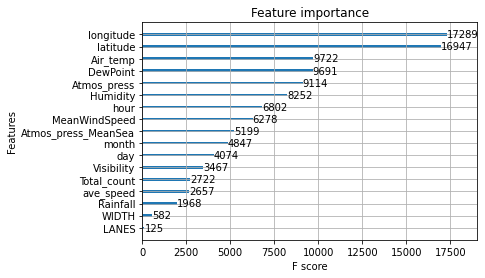

In [48]:
plot_importance(xgb_CountSpeed, max_num_features = 17)
plt.show()


In [50]:
#lets predict *PROBABILITIES*  on the training-set
y_pred_train = xgb_CountSpeed.predict_proba(X_train)
# keep probabilities for the positive outcome only
y_pred_train = y_pred_train[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

#lets predict *PROBABILITIES*  on the test-set
y_pred_test = xgb_CountSpeed.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_test = y_pred_test[:, 1]
# calculate roc curves
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_test)

In [51]:
print('Training log_loss:', log_loss(y_train, y_pred_train))
print('')
print('Test log_loss:', log_loss(y_test, y_pred_test))

Training log_loss: 0.01177640572084404

Test log_loss: 0.024827722324079746


#### Plot ROC curves for both the ```training``` and ```test``` datasets


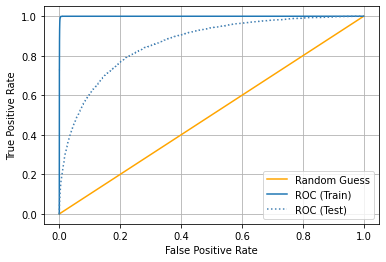

In [52]:
#plot
fig,ax = plt.subplots()
plt.plot([0,1],[0,1],'r-',label='Random Guess',color='orange')#,lw=3)
plt.plot(fpr,tpr,label='ROC (Train)')#,lw=3)
plt.plot(fpr_t,tpr_t,'r:',label='ROC (Test)',color='steelblue')#,lw=3)
#pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Train')
#pyplot.scatter(fpr_test[ix_t], tpr_test[ix_t], marker='o', color='red', label='Best Test')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Precision-Recall Curve

In [53]:
#for the training
# predict class values
yhat = xgb_CountSpeed.predict(X_train)
lr_precision, lr_recall, thresh = precision_recall_curve(y_train, y_pred_train)
lr_f1, lr_auc = f1_score(y_train, yhat), auc(lr_recall, lr_precision)
# summarize scores
print(' Training Classification: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('')
#for the training
# predict class values
yhat_t = xgb_CountSpeed.predict(X_test)
lr_precision_t, lr_recall_t, thresh_t = precision_recall_curve(y_test, y_pred_test)
lr_f1_t, lr_auc_t = f1_score(y_test, yhat_t), auc(lr_recall_t, lr_precision_t)
# summarize scores
print(' Test Classification: f1=%.3f auc=%.3f' % (lr_f1_t, lr_auc_t))

 Training Classification: f1=0.722 auc=0.875

 Test Classification: f1=0.109 auc=0.044


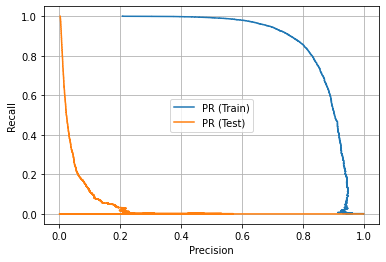

In [54]:
#plot
fig,ax = plt.subplots()
plt.plot(lr_precision,lr_recall,label='PR (Train)')#,lw=3)
plt.plot(lr_precision_t,lr_recall_t,label='PR (Test)')#,lw=3)
#pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best Training')
#pyplot.scatter(recall_test[ix_t], precision_test[ix_t], marker='o', color='red', label='Best Test')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid()
plt.legend()
plt.show()

#### Optimal Threshold

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


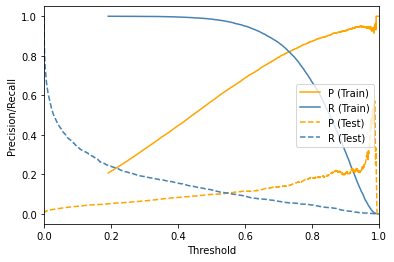

In [55]:
# threshold plot
plt.plot(thresh,lr_precision[:-1],'r-',label='P (Train)',color='orange')#,lw=3)
plt.plot(thresh,lr_recall[:-1],'r-',label='R (Train)',color='steelblue')#,lw=3)
plt.plot(thresh_t,lr_precision_t[:-1],'--',label='P (Test)',color='orange')
plt.plot(thresh_t,lr_recall_t[:-1],'--',label='R (Test)',color='steelblue')
#plt.plot([0,1],[0,1],'k-',lw=2)
plt.gca().set_xbound(lower=0,upper=1)
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

#### Threshold Tuning for F1-Score

In [56]:
# apply threshold to predictions to create labels
def to_labels(pos_preds, threshold):
  '''
  define a function to take the prediction and threshold as an argument and return an array of integers in {0, 1}
  '''
  return (pos_preds >= threshold).astype(int)

In [62]:
# define thresholds (start, stop, step)
threshold = np.arange(0, 1, 0.002)

# evaluate each threshold
scores = [f1_score(y_train, to_labels(y_pred_train, t)) for t in threshold]

# get best threshold
ix = argmax(scores)
print('Training Threshold = %.3f, F-Score = %.5f' % (threshold[ix], scores[ix]))

Training Threshold = 0.698, F-Score = 0.82784


## Predicting

#### First on the ```train``` - 2017.

In [63]:
print('Predicting on the Training-set with a Threshold of = %.3f' % 0.698)
train['pred'] = (xgb_CountSpeed.predict(train[x_cols]) > 0.698).astype(int)
print(' Accuracy:',accuracy_score(train['y'],train['pred']))
#rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (mean_squared_error(train['y'],train['pred'])))
print(' f1-score for the + class:',f1_score(train['y'],train['pred']))
print(' Precision for the + class:',precision_score(train['y'],train['pred']))
print(' Recall for the + class:',recall_score(train['y'],train['pred']))
#y_pred_train = model.predict(train[x_cols])
print(' AUC:',roc_auc_score(train['y'],train['pred']))
print(' Ave. Precision:',average_precision_score(train['y'],train['pred']))

Predicting on the Training-set with a Threshold of = 0.698
 Accuracy: 0.9968233617907173
RMSE: 0.003177
 f1-score for the + class: 0.5925173703901657
 Precision for the + class: 0.4804541908641761
 Recall for the + class: 0.7727589572006134
 AUC: 0.8851269964644757
 Ave. Precision: 0.371954440097385


Confusion matrix, without normalization
[[4773709   11988]
 [   3260   11086]]


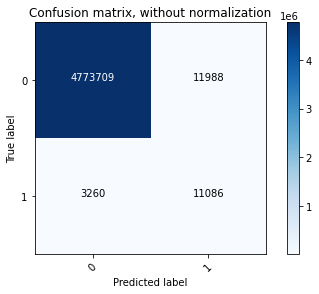

In [66]:
cnf_matrix = confusion_matrix(train['y'], train['pred'])
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

In [67]:
#have a look at the built-in report
print(classification_report(train['y'], train['pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4785697
           1       0.48      0.77      0.59     14346

    accuracy                           1.00   4800043
   macro avg       0.74      0.89      0.80   4800043
weighted avg       1.00      1.00      1.00   4800043



#### Now our personal ```test``` - 4 months towards the end of 2018.

In [68]:
print('Predicting on the Test-set with a Threshold of = %.3f' % 0.698)
test['pred'] = (xgb_CountSpeed.predict(test[x_cols]) > 0.698).astype(int)
print (' Accuracy:',accuracy_score(test['y'],test['pred']))
#rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (mean_squared_error(test['y'], test['pred'])))
print (' f1-score for the + class:',f1_score(test['y'],test['pred']))
print (' Precision for the + class:',precision_score(test['y'],test['pred']))
print (' Recall for the + class:',recall_score(test['y'],test['pred']))
#y_pred_test = model.predict(test[x_cols])
print (' AUC:',roc_auc_score(test['y'],test['pred']))
print (' Ave. Precision:',average_precision_score(test['y'],test['pred']))

Predicting on the Test-set with a Threshold of = 0.698
 Accuracy: 0.9933994230476231
RMSE: 0.006601
 f1-score for the + class: 0.02619357235742151
 Precision for the + class: 0.06727099236641221
 Recall for the + class: 0.016262975778546712
 AUC: 0.5075126901104883
 Ave. Precision: 0.0064637633400205655


Confusion matrix, without normalization
[[1577721    1955]
 [   8529     141]]


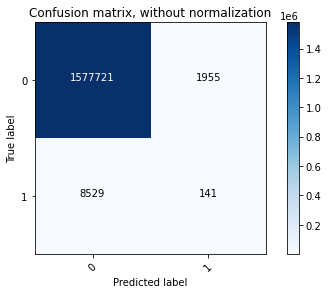

In [69]:
cnf_matrix = confusion_matrix(test['y'], test['pred'])
plot_confusion_matrix(cnf_matrix, classes=['0', '1'],
                      title='Confusion matrix, without normalization')

In [70]:
#have a look at the built-in report
print(classification_report(test['y'], test['pred']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1579676
           1       0.07      0.02      0.03      8670

    accuracy                           0.99   1588346
   macro avg       0.53      0.51      0.51   1588346
weighted avg       0.99      0.99      0.99   1588346



In [72]:
print(len(test))
good = test.loc[test['pred'] == 1]
print(len(good))

1588346
2096


In [73]:
#save it
test[['segment_id', 'y', 'year', 'month', 'day', 'hour', 'latitude', 'longitude', 'pred']].to_csv(path/'data/04_predictions.csv', 
                                                                                                 index=False)